In [1]:
##We start off by importing all our necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the data from CSV
data = pd.read_csv("Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv")
data.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Company            0
File No.           0
Opened             0
Closed           963
Coverage        2440
SubCoverage     8960
Reason          2617
SubReason       2617
Disposition    15288
Conclusion     17094
Recovery           0
Status             0
dtype: int64


In [4]:
# Basic statistics of numerical columns
data.describe()

,File No.,Recovery
count,3.826700e+04,38267.000000
mean,7.032932e+06,1731.634862
std,1.890661e+04,15224.331603
min,7.000002e+06,0.000000
25%,7.013760e+06,0.000000
50%,7.042086e+06,0.000000
75%,7.049744e+06,0.000000
max,7.056168e+06,843825.850000


In [5]:
# Unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")

Company: 765 unique values
Opened: 1603 unique values
Closed: 1377 unique values
Coverage: 53 unique values
SubCoverage: 102 unique values
Reason: 4 unique values
SubReason: 179 unique values
Disposition: 13 unique values
Conclusion: 52 unique values
Status: 21 unique values


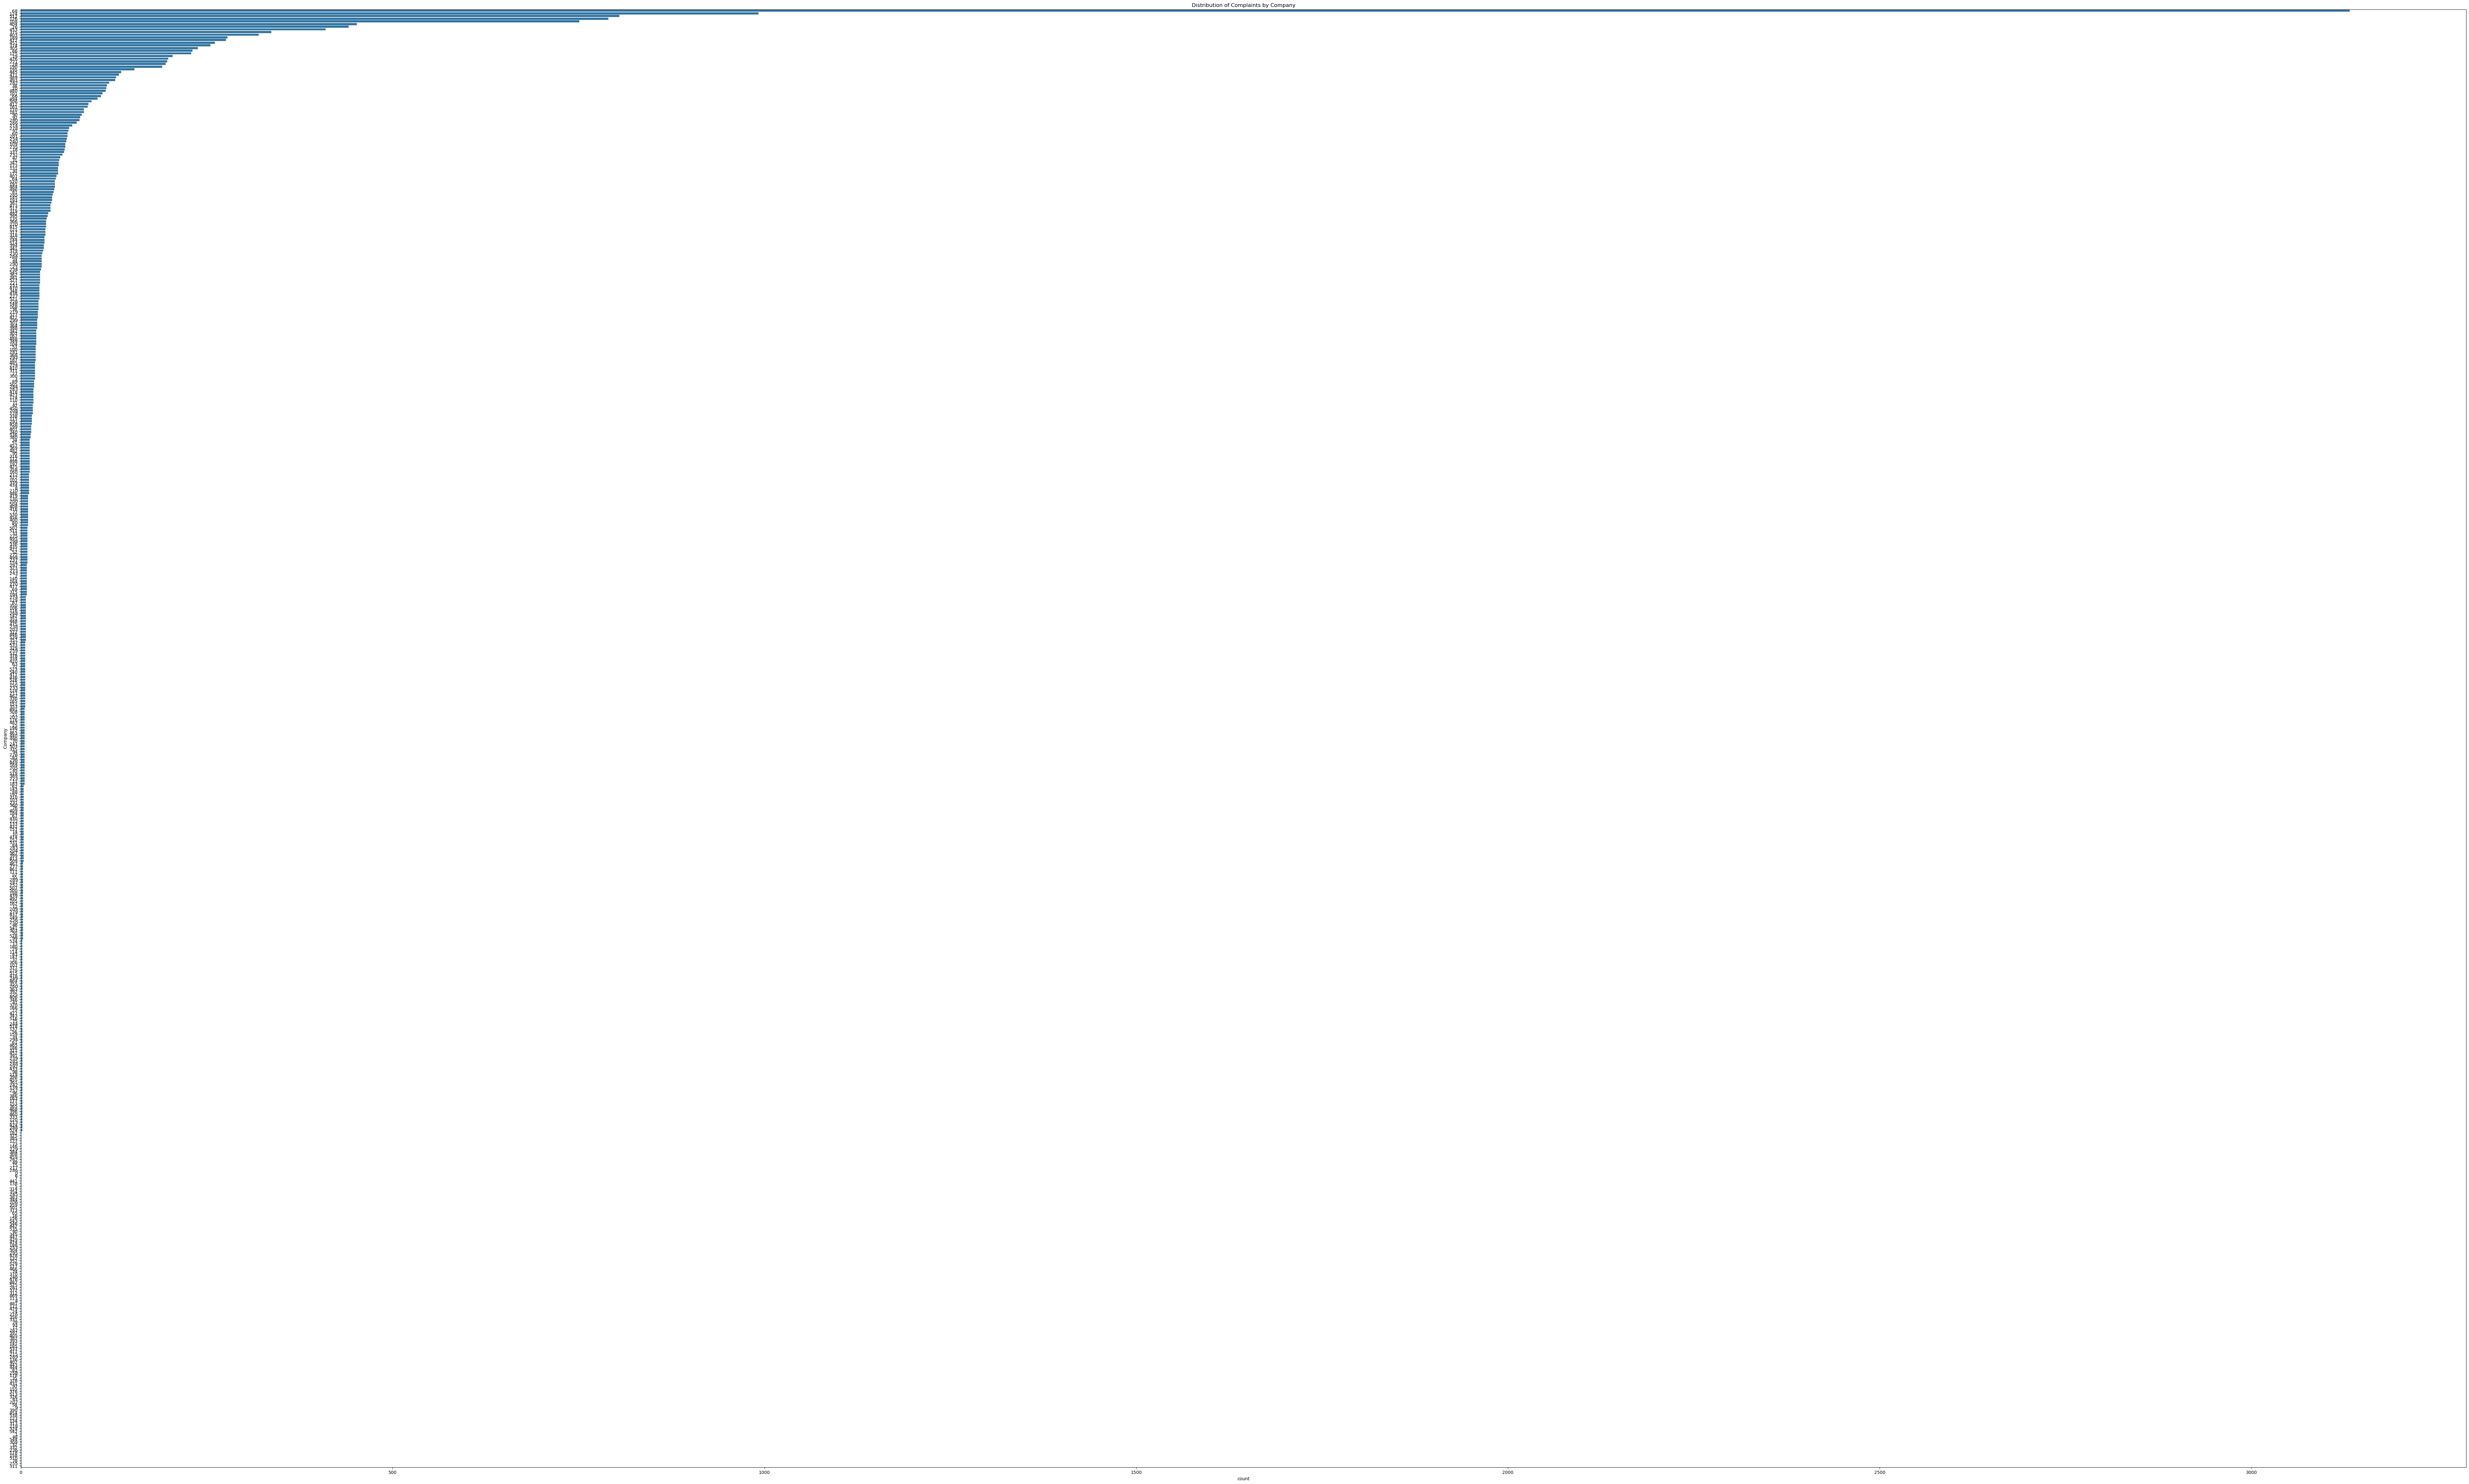

In [34]:
# Distribution of complaints by company
plt.figure(figsize=(100, 60))
sns.countplot(y='Company', data=data, order=data['Company'].value_counts().index)
plt.title('Distribution of Complaints by Company')
plt.show()

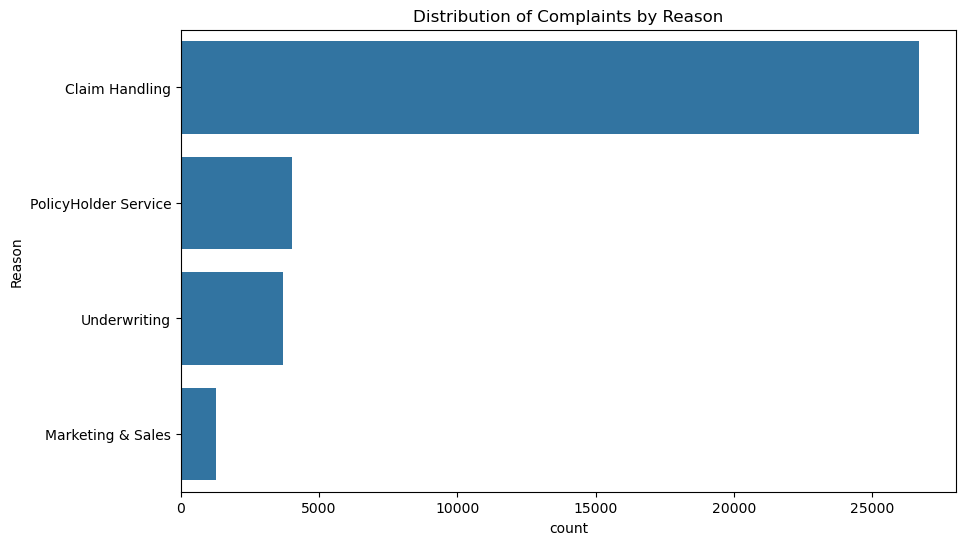

In [8]:
# Distribution of complaints by reason
plt.figure(figsize=(10, 6))
sns.countplot(y='Reason', data=data, order=data['Reason'].value_counts().index)
plt.title('Distribution of Complaints by Reason')
plt.show()

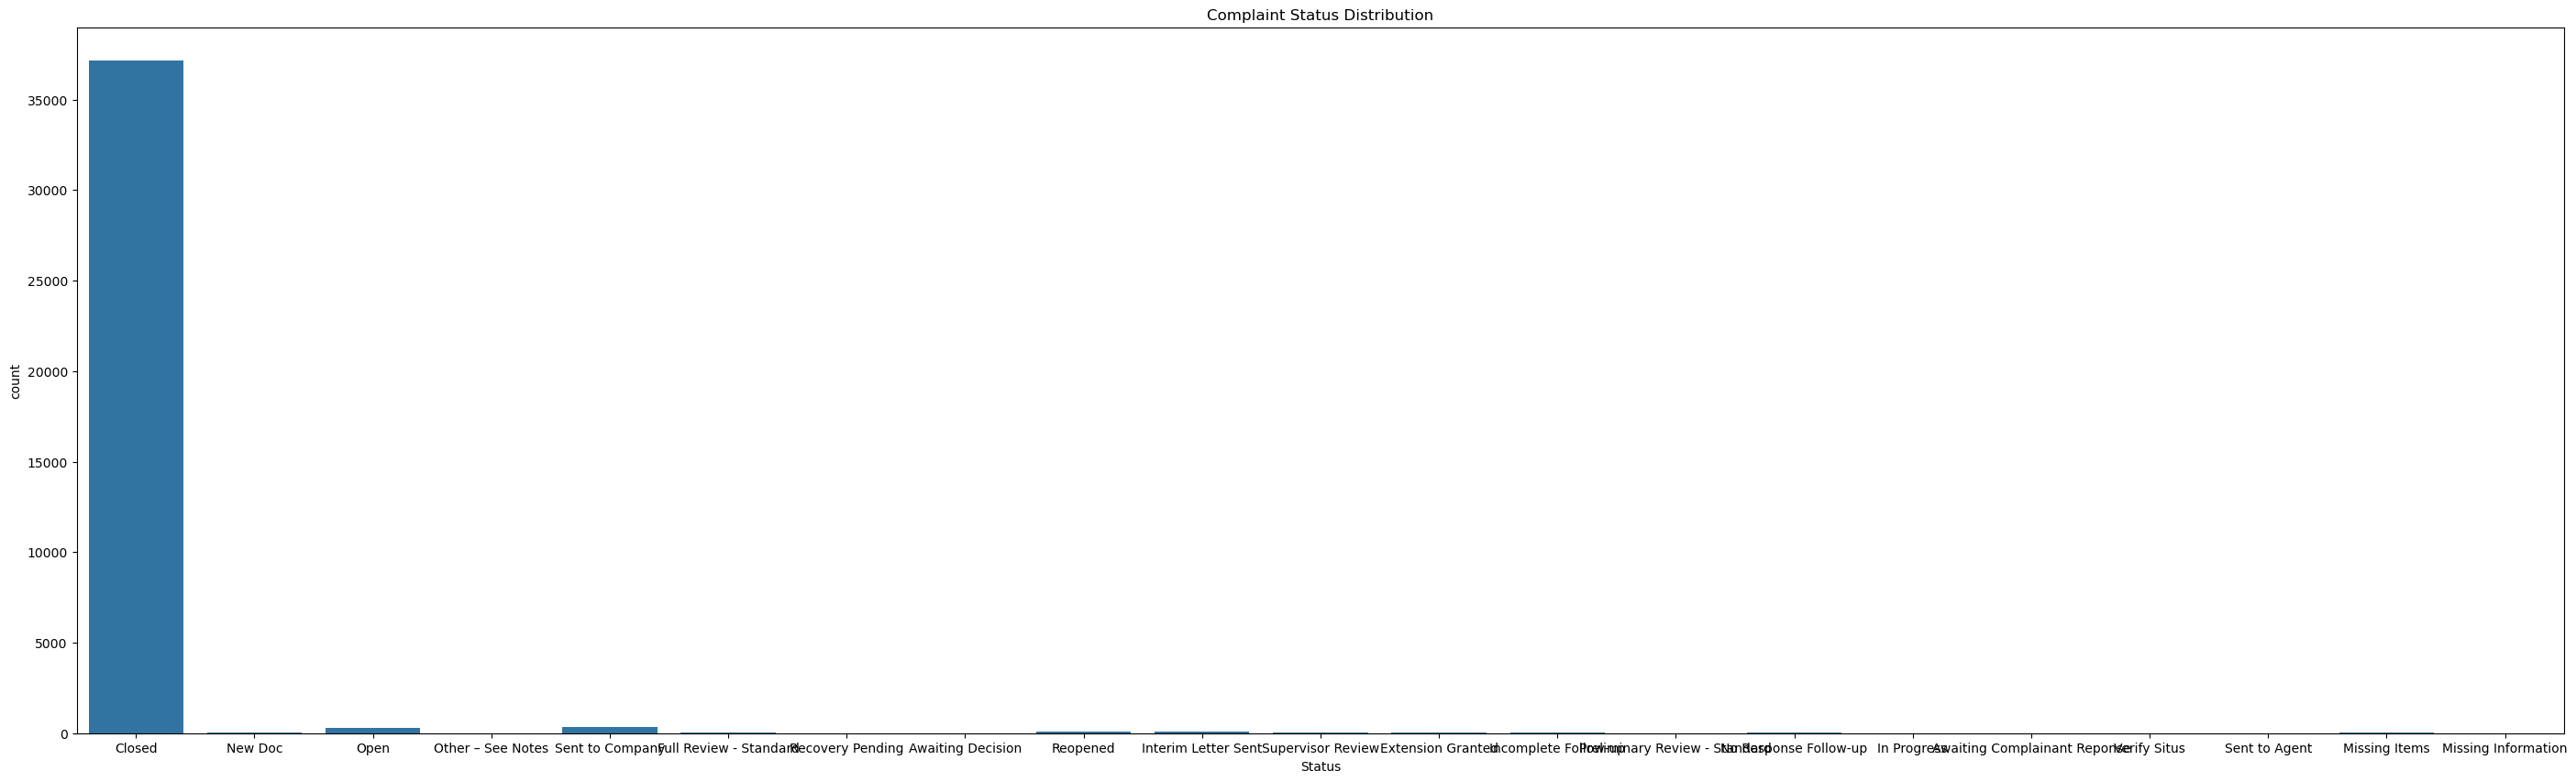

In [15]:
# Status distribution
plt.figure(figsize=(35, 10))
sns.countplot(x='Status', data=data)
plt.title('Complaint Status Distribution')
plt.show()

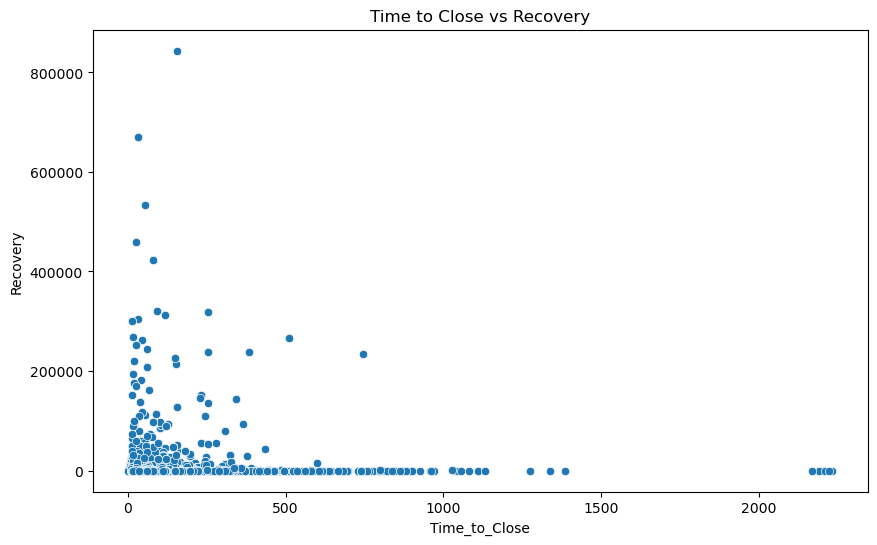

In [20]:
# Time to Close vs Recovery
data['Time_to_Close'] = pd.to_datetime(data['Closed']) - pd.to_datetime(data['Opened'])
data['Time_to_Close'] = data['Time_to_Close'].dt.days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_to_Close', y='Recovery', data=data)
plt.title('Time to Close vs Recovery')
plt.show()

In [22]:
# Filling missing values (simple approach)
data['Conclusion'].fillna('Unknown', inplace=True)
data['Recovery'].fillna(0, inplace=True)

C:\Users\Tadi\AppData\Local\Temp\ipykernel_9184\3412405488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Conclusion'].fillna('Unknown', inplace=True)
C:\Users\Tadi\AppData\Local\Temp\ipykernel_9184\3412405488.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [23]:
# Dropping rows with missing values
data.dropna(inplace=True)

In [24]:
# Label encoding for categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [25]:
##Feauture scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Status']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [26]:
X = data_scaled
y = data['Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

In [28]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[5538    0    0    0]
 [   1    0    0    0]
 [   3    0   19    0]
 [   1    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5538
           2       0.00      0.00      0.00         1
           4       1.00      0.86      0.93        22
           5       0.00      0.00      0.00         1

    accuracy                           1.00      5562
   macro avg       0.50      0.47      0.48      5562
weighted avg       1.00      1.00      1.00      5562

Accuracy: 1.00


C:\Users\Tadi\Desktop\sampleP_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tadi\Desktop\sampleP_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tadi\Desktop\sampleP_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

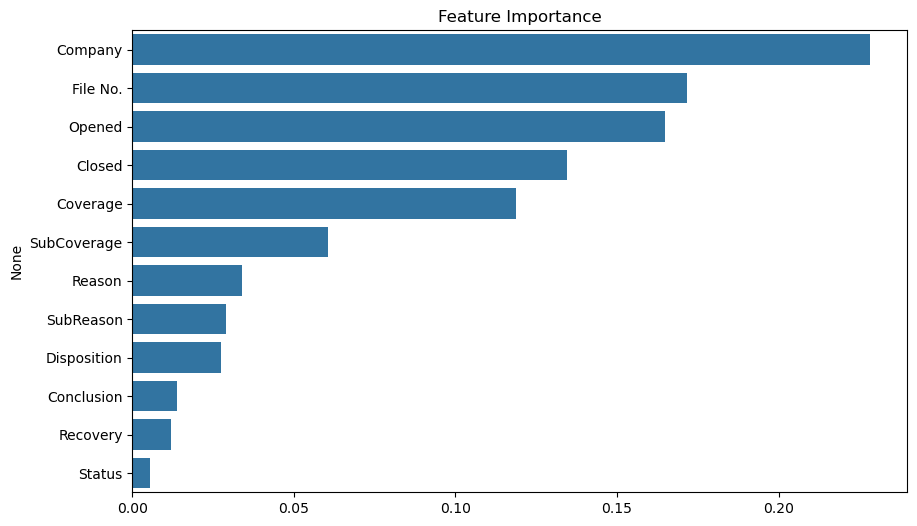

In [29]:
# Feature importance visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(y=data.columns[:-1], x=importances[indices])
plt.title('Feature Importance')
plt.show()